Accuracy:  [74.58165002951101, 71.08340974199702, 88.28664185140222]
Accuracy:  [71.20832285493606, 71.66534827130397, 58.83669414684453]
Accuracy:  [75.31783650099159, 74.21875977208387, 67.13568273483689]
Accuracy:  [75.3178365  71.5641637  61.31620624]
Accuracy:  69.72328061454623


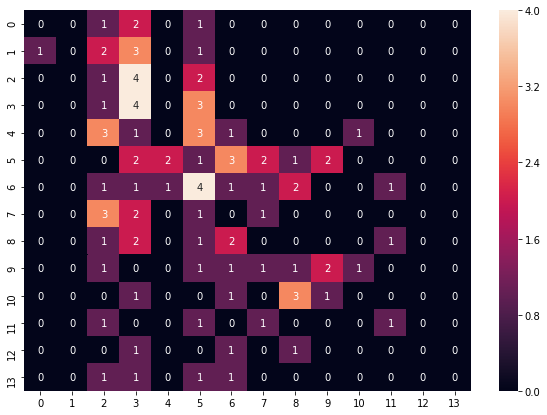

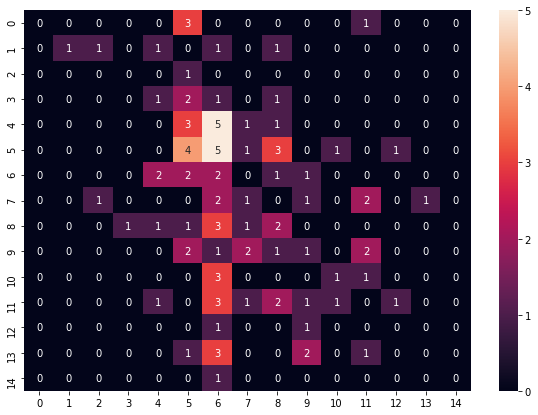

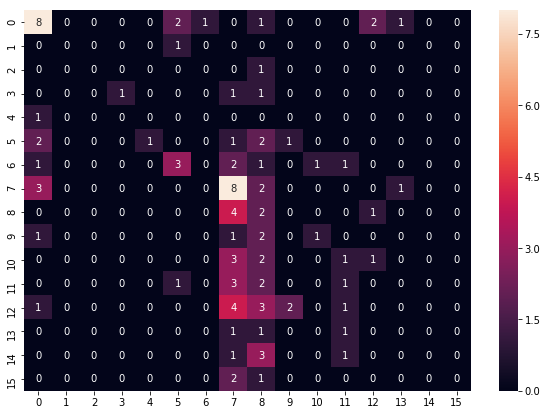

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan  5 20:33:05 2019

@author: Pavilion
"""

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def accu(y_pred,y_test):
    final_acc = 0
    for i in range(99):
        final_acc += abs(y_pred[i] - y_test.values[i,0])/y_test.values[i , 0]
    print(final_acc / 99)  
# Importing the dataset
dataset = pd.read_csv('student-mat.csv')
X = dataset.iloc[:,0:30]
X1=X.columns
y = dataset.iloc[:,30:33]


# Encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

feat=[0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]
for i,value in enumerate(feat):
    labelencoder_X_1 = LabelEncoder()
    X.iloc[:, value] = labelencoder_X_1.fit_transform(X.iloc[:,value])
    
onehot=[3,6,7,8,9,10,11,23,24,25,26,27,28] 
one_X_1 =OneHotEncoder(categorical_features=onehot)
X= one_X_1.fit_transform(X).todense()


# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Fitting SVM to the Training set
from sklearn.svm import SVC
regressor = SVC()
regressor.fit(X_train, y_train.iloc[: ,0])
y_pred=regressor.predict(X_test)
Total_acc = [0 , 0 , 0]
final_acc = 0
for i in range(99):
    final_acc += abs(y_pred[i] - y_test.values[i,0])/y_test.values[i , 0]
Total_acc[0] = (1-final_acc / 99)*100
regressor.fit(X_train, y_train.iloc[: ,1])
y_pred=regressor.predict(X_test)

final_acc = 0
j = 0
for i in range(99):
    if y_test.values[i][1] != 0 :
        final_acc += abs(y_pred[i] - y_test.values[i,1])/y_test.values[i , 1]
        j += 1
Total_acc[1] = (1-final_acc / j)*100
regressor.fit(X_train, y_train.iloc[: ,2])
y_pred=regressor.predict(X_test)

final_acc = 0
for i in range(99):
    if y_test.values[i][2] != 0 :
        final_acc += abs(y_pred[i] - y_test.values[i,2])/y_test.values[i , 2]
        j += 1
Total_acc[2] = (1-final_acc / j)*100

print("Accuracy: " , Total_acc)  


# Fitting DecisionTree to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0,min_samples_split=5,min_samples_leaf=20 ,max_depth=500,max_leaf_nodes=None)
classifier.fit(X_train, y_train.iloc[:,0])
y_pred=classifier.predict(X_test)
Total_acc = [0 , 0 , 0]
final_acc = 0
j = 0
for i in range(99):
    if y_test.values[i][0] != 0 :
        final_acc += abs(y_pred[i] - y_test.values[i,0])/y_test.values[i , 0]
        j += 1
Total_acc[0] = (1-final_acc / j)*100
classifier.fit(X_train, y_train.iloc[:,1])
y_pred=classifier.predict(X_test)
final_acc = 0
j = 0
for i in range(99):
    if y_test.values[i][1] != 0 :
        final_acc += abs(y_pred[i] - y_test.values[i,1])/y_test.values[i , 1]
        j += 1
Total_acc[1] = (1-final_acc / j)*100
classifier.fit(X_train, y_train.iloc[:,2])
y_pred=classifier.predict(X_test)
final_acc = 0
j = 0
for i in range(99):
    if y_test.values[i][2] != 0 :
        final_acc += abs(y_pred[i] - y_test.values[i,2])/y_test.values[i , 2]
        j += 1
Total_acc[2] = (1-final_acc / j)*100
print("Accuracy: " , Total_acc)  


# Fitting RandomForest to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0,n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
Total_acc = [0 , 0 , 0]
final_acc = 0
j = 0
for i in range(99):
    if y_test.values[i][0] != 0 :
        final_acc = final_acc + abs(y_pred[i][0] - y_test.values[i][0])/(y_test.values[i][0])
        j += 1
Total_acc[0] = (1-final_acc / j)*100
final_acc = 0
j = 0
for i in range(99):
    if y_test.values[i][1] != 0 :
        final_acc = final_acc + abs(y_pred[i][1] - y_test.values[i][1])/(y_test.values[i][1])
        j += 1;
Total_acc[1] = (1-final_acc / j)*100
final_acc = 0
j = 0
for i in range(99):
    if y_test.values[i][2] != 0 :
        final_acc = final_acc + abs(y_pred[i][2] - y_test.values[i][2])/(y_test.values[i][2])
        j += 1;
Total_acc[2] = (1-final_acc / j)*100
print("Accuracy: " , Total_acc)

import seaborn as sn
# Making the Confusion Matrix
for i in range(0,3):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test.values[:,i], y_pred[:,i])
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True)
# Fitting SVR to the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'sigmoid',degree=10)
regressor.fit(X_train,y_train.iloc[:,0])
y_pred =np.round( classifier.predict(X_test))

final_acc = 0
for i in range(99):
    final_acc += abs(y_pred[i] - y_test.values[i,0])/y_test.values[i , 0]
print("Accuracy: " , (1-final_acc / 99)*100)  
 


# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train.iloc[: , 0])

# Predicting the Test set results
y_pred = classifier.predict(X_test)
final_acc = 0
for i in range(99):
    final_acc += abs(y_pred[i] - y_test.values[i,0])/y_test.values[i , 0]
print("Accuracy: " , (1-final_acc / 99)*100)  



# As we can see highest Accuracy is with random forest classification.

# Second best is Support Vector Classification.

# Third best is Support Vector Regression.

# Also implemented Decision Tree and Logistic Regression models. 